<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem3/blob/main/CV_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

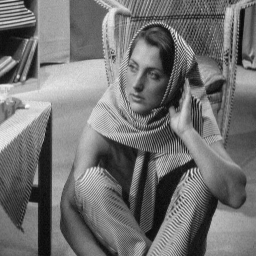

In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img1 = cv2.imread("/content/barbara.jpg", 0)
img1 = cv2.resize(img1, (256, 256), interpolation= cv2.INTER_LINEAR)
cv2_imshow(img1)


In [ ]:
def DFT_1D(fx):
    fx = np.asarray(fx, dtype=complex)
    M = fx.shape[0]
    fu = fx.copy()

    for i in range(M):
        u = i
        sum = 0
        for j in range(M):
            x = j
            tmp = fx[x]*np.exp(-2j*np.pi*x*u*np.divide(1, M, dtype=complex))
            sum += tmp
        # print(sum)
        fu[u] = sum
    # print(fu)

    return fu


def DFT_2D(fu):
    h, w = fu.shape[0], fu.shape[1]

    fx = np.zeros(fu.shape, dtype=complex)

    if len(fu.shape) == 2:
        for i in range(h):
            fx[i, :] = DFT_1D(fu[i, :])

        for i in range(w):
            fx[:, i] = DFT_1D(fx[:, i])


    elif len(fu.shape) == 3:
        for ch in range(3):
            fx[:, :, ch] = DFT_2D(fu[:, :, ch])

    #fx = np.real(fx)
    return fx

In [ ]:
def inverseDFT_1D(fu):
    fu = np.asarray(fu, dtype=complex)
    M = fu.shape[0]
    fx = np.zeros(M, dtype=complex)

    for i in range(M):
        x = i
        sum = 0
        for j in range(M):
            u = j
            tmp = fu[u]*np.exp(2j*np.pi*x*u*np.divide(1, M, dtype=complex))
            sum += tmp
        fx[x] = np.divide(sum, M, dtype=complex)

    return fx

def inverseDFT_2D(fu):
    h, w = fu.shape[0], fu.shape[1]

    fx = np.zeros(fu.shape, dtype=complex)

    if len(fu.shape) == 2:
        for i in range(h):
            fx[i, :] = inverseDFT_1D(fu[i, :])

        for i in range(w):
            fx[:, i] = inverseDFT_1D(fx[:, i])

    elif len(fu.shape) == 3:
        for ch in range(3):
            fx[:, :, ch] = inverseDFT_2D(fu[:, :, ch])


    #fx = np.real(fx)
    return fx

In [ ]:
fx = DFT_2D(img1)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


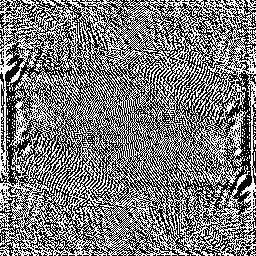

In [ ]:
cv2_imshow(fx)

In [ ]:
def shift(F):
    ''' this shifts the centre of FFT of images/2-d signals'''
    M, N = F.shape[:2]
    R1, R2 = F[0: M//2, 0: N//2], F[M//2: M, 0: N//2]
    R3, R4 = F[0: M//2, N//2: N], F[M//2: M, N//2: N]
    print(R1.shape, R2.shape, R3.shape, R4.shape)
    sF = np.zeros(F.shape,dtype = F.dtype)
    sF[M//2: M, N//2: N], sF[0: M//2, 0: N//2] = R1, R4
    sF[M//2: M, 0: N//2], sF[0: M//2, N//2: N]= R3, R2
    return sF

(128, 128) (128, 128) (128, 128) (128, 128)


/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


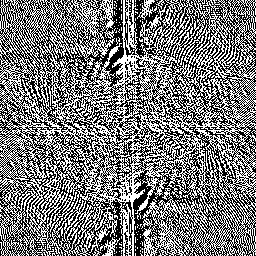

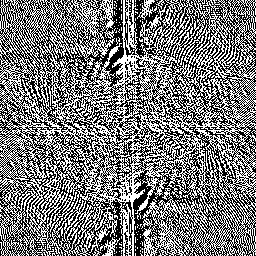

In [ ]:
sF = shift(fx)
cv2_imshow(sF)
dft_shift = np.fft.fftshift(fx)
cv2_imshow(dft_shift)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


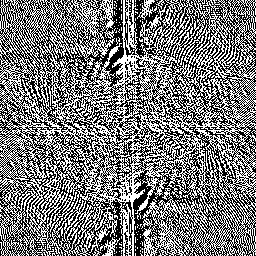

In [ ]:
cv2_imshow(sF)

In [ ]:
sF.shape

(256, 256)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


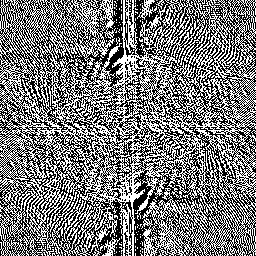

In [ ]:
dft_shift = np.fft.fftshift(fx)
cv2_imshow(dft_shift)

In [ ]:
rows, cols = img1.shape[:2]
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols), np.uint8)
r = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


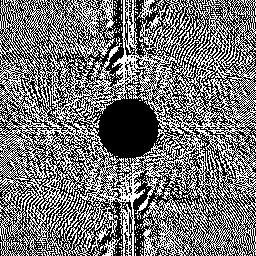

In [ ]:
fshift = sF * mask
cv2_imshow(fshift)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


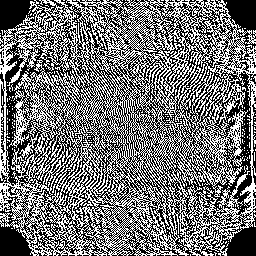

In [ ]:
f_ishift = np.fft.ifftshift(fshift)
cv2_imshow(f_ishift)
imgg = inverseDFT_2D(f_ishift)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


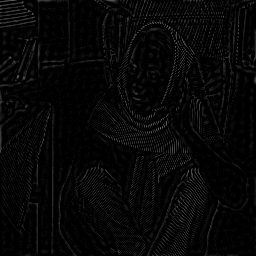

In [ ]:
cv2_imshow(imgg)

In [ ]:
rows, cols = img1.shape[:2]
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.zeros((rows, cols), np.uint8)
r = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


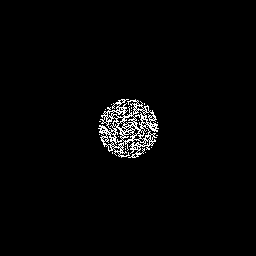

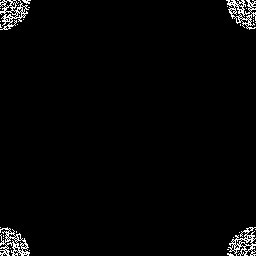

In [ ]:
fshift = sF * mask
cv2_imshow(fshift)
f_ishift = np.fft.ifftshift(fshift)
cv2_imshow(f_ishift)
imgg = inverseDFT_2D(f_ishift)
cv2_imshow(imgg)

In [ ]:
import pywt

img2 =  cv2.imread("/content/figure1-5e71be566aa8714a04de3386-98-left.jpeg", 0)
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
(cA, cD) = pywt.dwt2(img2, 'db15', 'smooth')
LL, (LH, HL, HH) = (cA, cD)
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [ ]:
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")

def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    output = np.zeros_like(image)

    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

LL1 = convolve2d(LL, laplacian)
cv2_imshow(LL1)

In [ ]:
LL2 = LL - LL1
cv2_imshow(LL2)

In [ ]:

for a in [LH, HL, HH]:
  
  img3 = pywt.idwt(LL2, a, 'db15', 'smooth')
  cv2_imshow(img3)


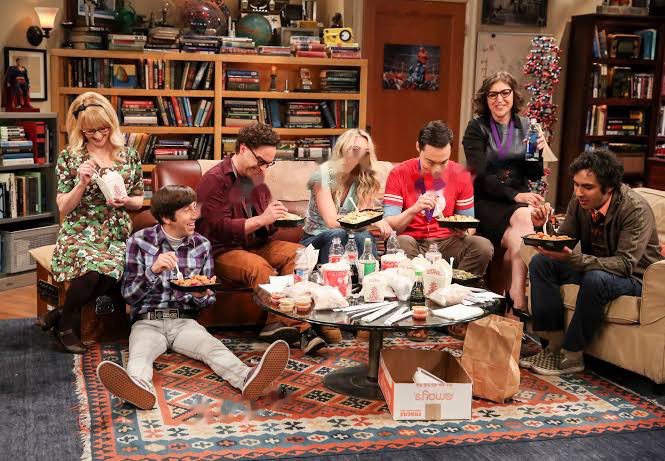

In [ ]:
import numpy as np
import cv2
  
# Open the image.
img = cv2.imread('/content/image.png')
  
# Load the mask.
mask = cv2.imread('/content/mask.png', 0)
  
# Inpaint.
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)
  
# Write the output.
cv2_imshow(dst)

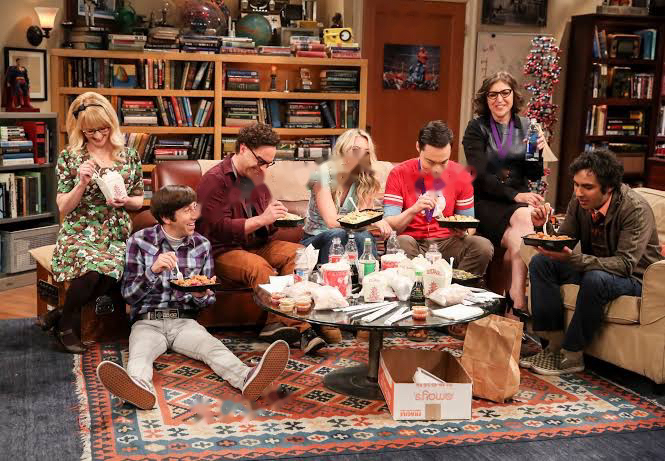

In [ ]:
import numpy as np
import cv2
  
# Open the image.
img = cv2.imread('/content/image.png')
  
# Load the mask.
mask = cv2.imread('/content/mask.png', 0)
  
# Inpaint.
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)
  
# Write the output.
cv2_imshow(dst)

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_1 = cv2.imread('/content/img1.jpeg')

img_2 = cv2.imread('/content/img2.jpeg')

img_3 = cv2.imread('/content/img3.jpeg')

img_4 = cv2.imread('/content/img4.jpeg')

img_5 = cv2.imread('/content/img5.jpeg')



In [3]:
img1 = cv2.imread('/content/img1.jpeg', 0)

img2 = cv2.imread('/content/img2.jpeg', 0)

img3 = cv2.imread('/content/img3.jpeg', 0)

img4 = cv2.imread('/content/img4.jpeg', 0)

img5 = cv2.imread('/content/img5.jpeg', 0)



In [57]:
im_mask = np.full(result.shape, 255, dtype = np.uint8)
center = (result.shape[1]/2, result.shape[0]/2)
im_clone = cv2.seamlessClone(result, img2, im_mask, center, cv2.MIXED_CLONE)

error: ignored

In [27]:
def stitch_images(img1, img_1, img2, img_2):

  orb = cv2.ORB_create(nfeatures=2000)

  # Find the key points and descriptors with ORB
  keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
  keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

  bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
  matches = bf.knnMatch(descriptors1, descriptors2,k=2)

  good = []
  for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append(m)

  MIN_MATCH_COUNT = 10

  if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ keypoints1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([ keypoints2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    result = warpImages(img_2, img_1, M)

    return result

In [91]:
def warpImages(img1, img2, H):

  rows1, cols1 = img1.shape[:2]
  rows2, cols2 = img2.shape[:2]

  list_of_points_1 = np.float32([[0,0], [0, rows1],[cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
  temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)

  # When we have established a homography we need to warp perspective
  # Change field of view
  list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

  list_of_points = np.concatenate((list_of_points_1,list_of_points_2), axis=0)

  [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
  [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)
  
  translation_dist = [-x_min,-y_min]
  
  H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

  output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max-x_min, y_max-y_min))
  #output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0]] = img1

  return output_img

In [92]:
result1 = stitch_images(img1, img_1, img2, img_2)

In [8]:
result2 =  stitch_images(result1, result1, img3, img_3)

In [9]:
result3 = stitch_images(result2, result2, img4, img_4)

In [ ]:
#result4 = stitch_images(result3, result3, img5, img_5)

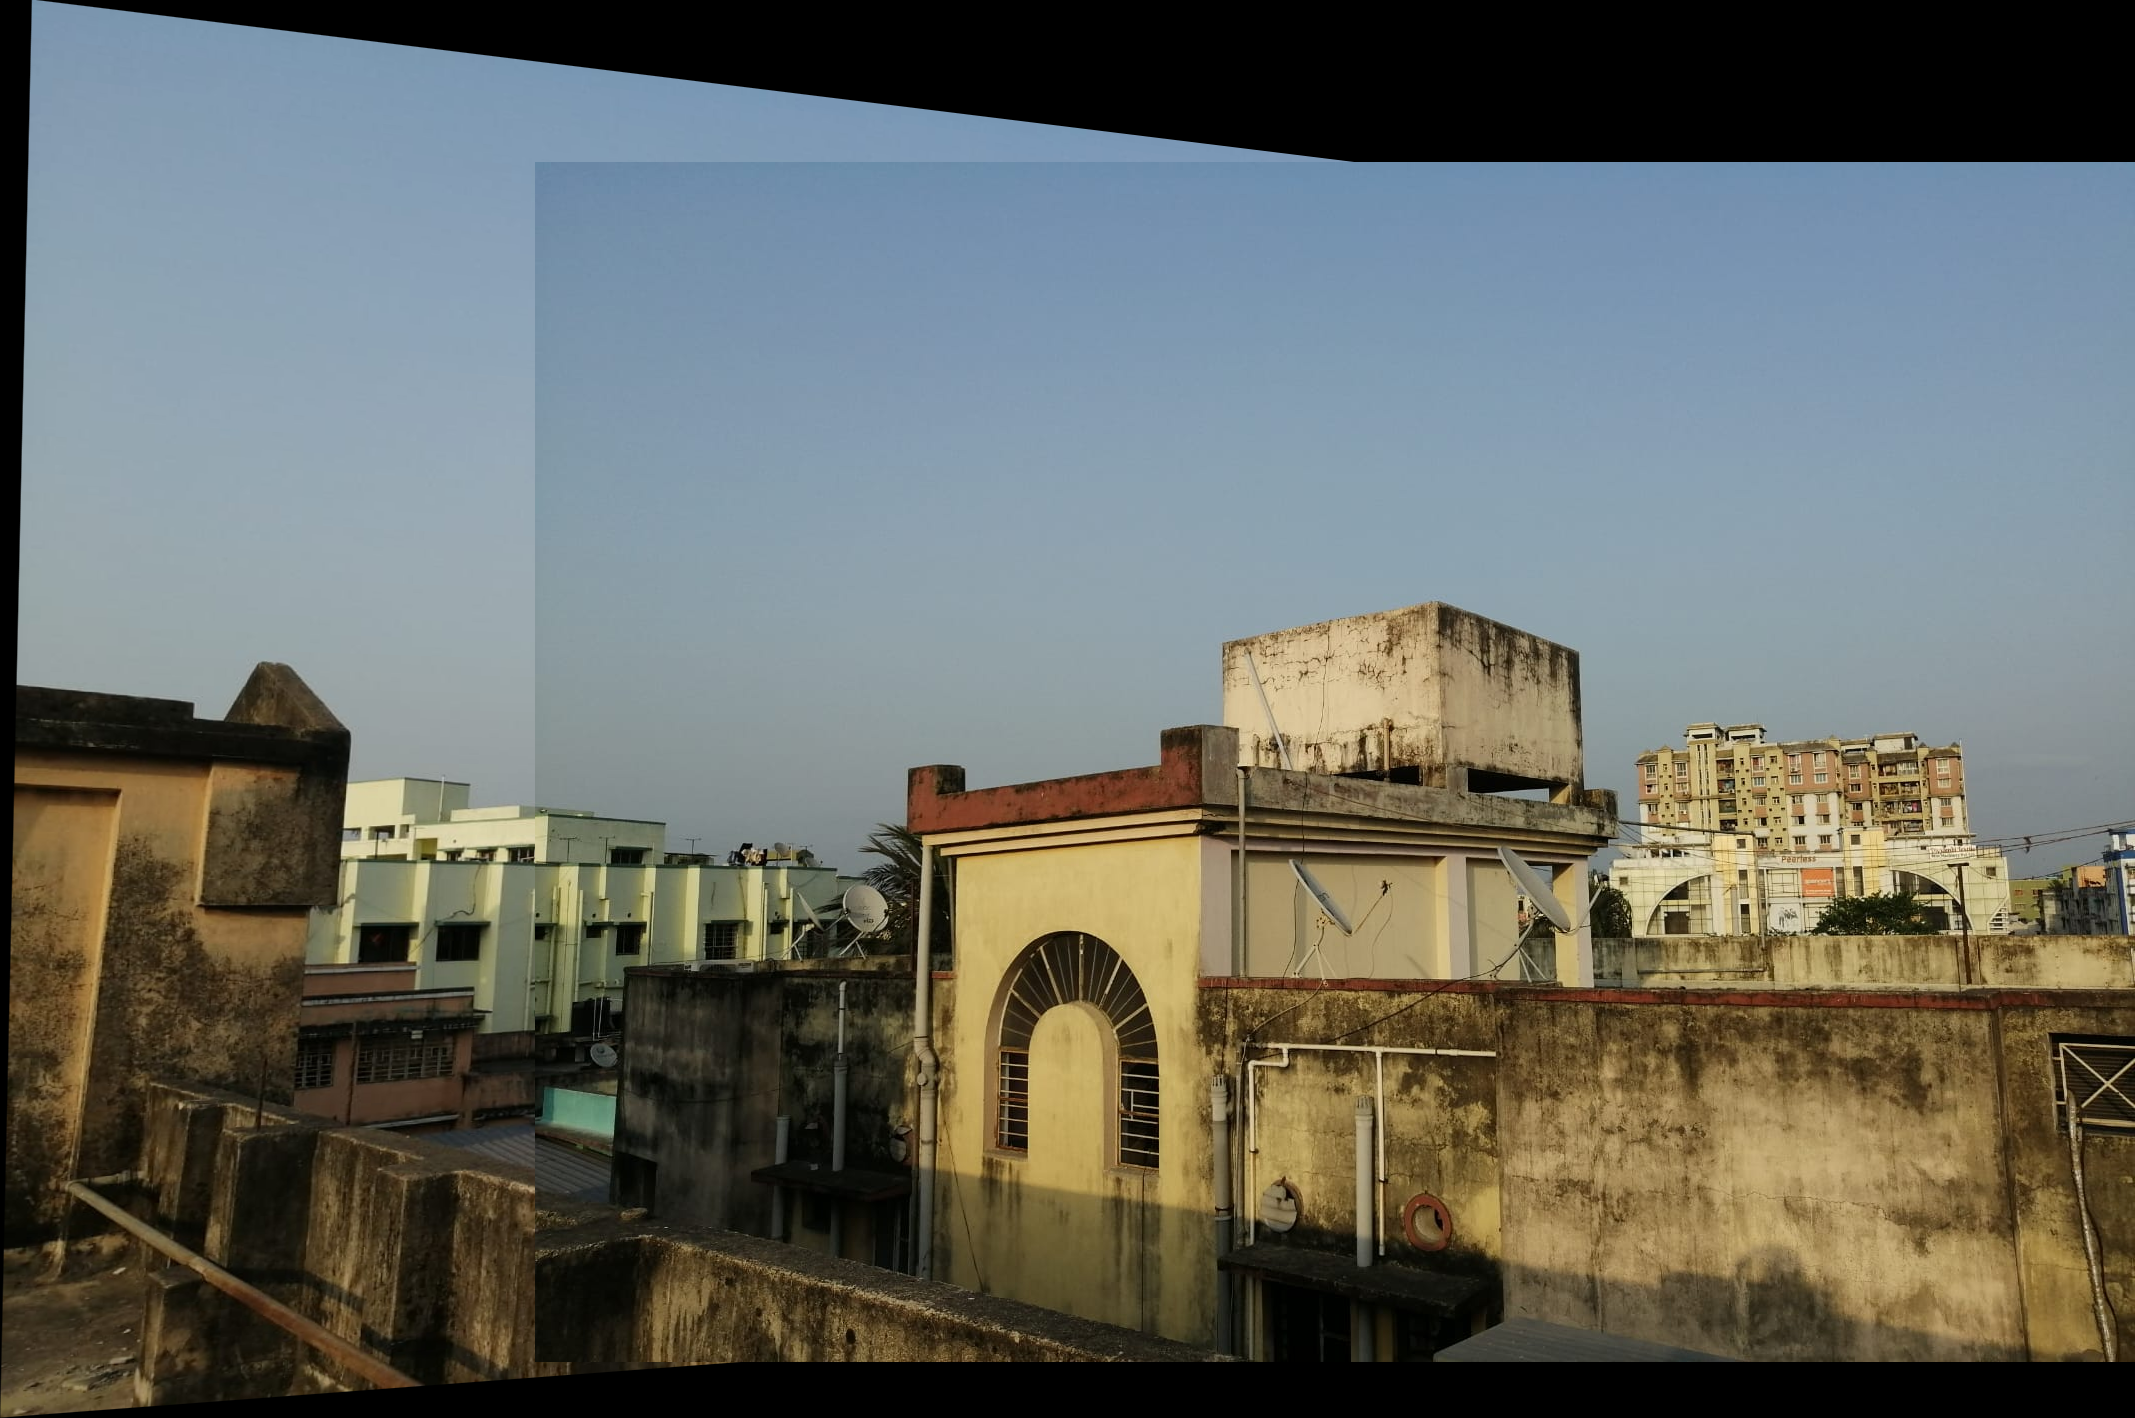

In [90]:
cv2_imshow(result1)

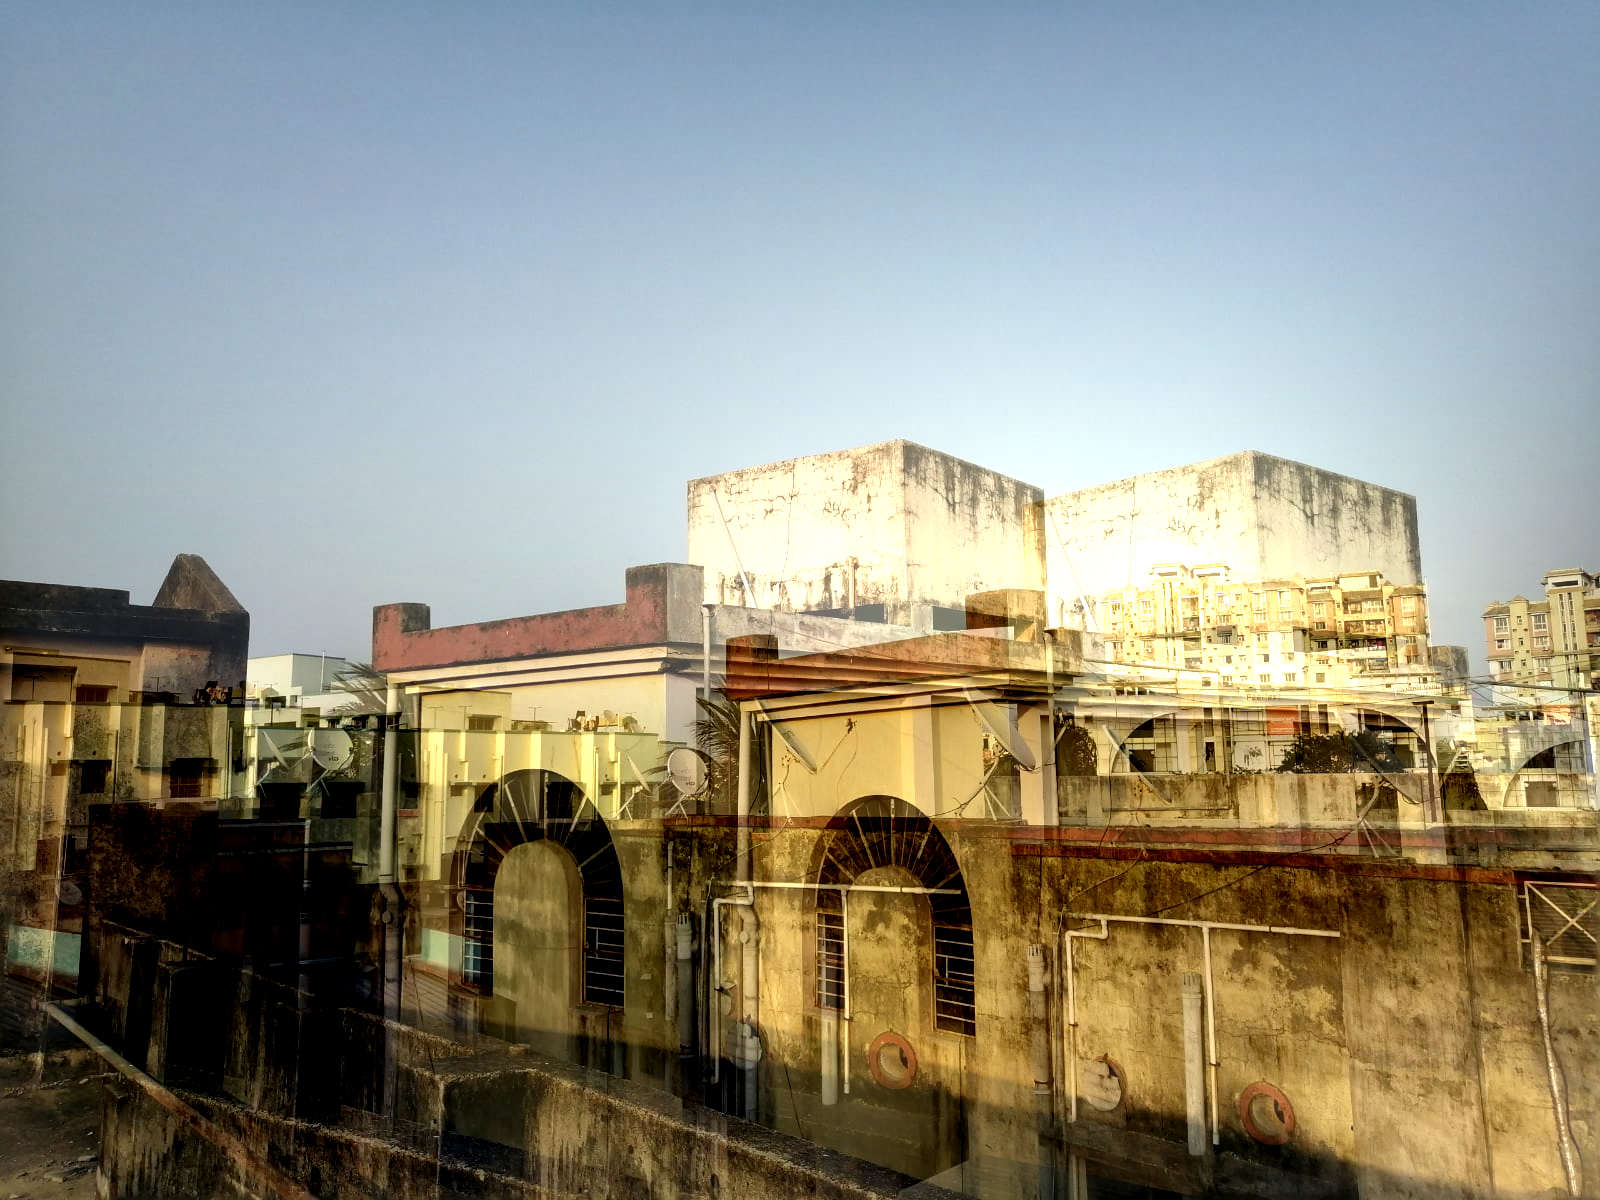

In [16]:

im_mask = np.full(img_2.shape, 255, dtype = np.uint8)
    
center = (img_1.shape[1]//2, img_1.shape[0]//2)

im_clone = cv2.seamlessClone(img_2, img_1, im_mask, center, cv2.MIXED_CLONE)

cv2_imshow(im_clone)